In [44]:
import pandas as pd
import json 
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
with open('dim_customer.json') as json_file:
    data = json.load(json_file)

### How many unique customers are in the dataset? 

In [45]:
df['customer_id'].nunique()

5191

### What are the different categories of products available? How many unique categories are there?

In [46]:
df['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

### Which payment method is the most popular? How many times was it used?

In [47]:
df['payment_method'].value_counts().idxmax(), df['payment_method'].value_counts().max() 

('Cash', 44447)

### What are the three most popular categories, by total sales?

In [48]:
df['category'].value_counts().nlargest(3)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: category, dtype: int64

### What are the total sales attributed to customers over the age of 45?

In [49]:
age_id = pd.DataFrame(data['age'].items(), columns=['customer_id', 'age'])
age_id['customer_id'] = age_id['customer_id'].astype(int)
merged_data = df.merge(age_id, on='customer_id')
age_over_45 = merged_data[merged_data['age'] > 45]
age_over_45['price'].sum()

22340695.65

### How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Dates and Number of Sales)

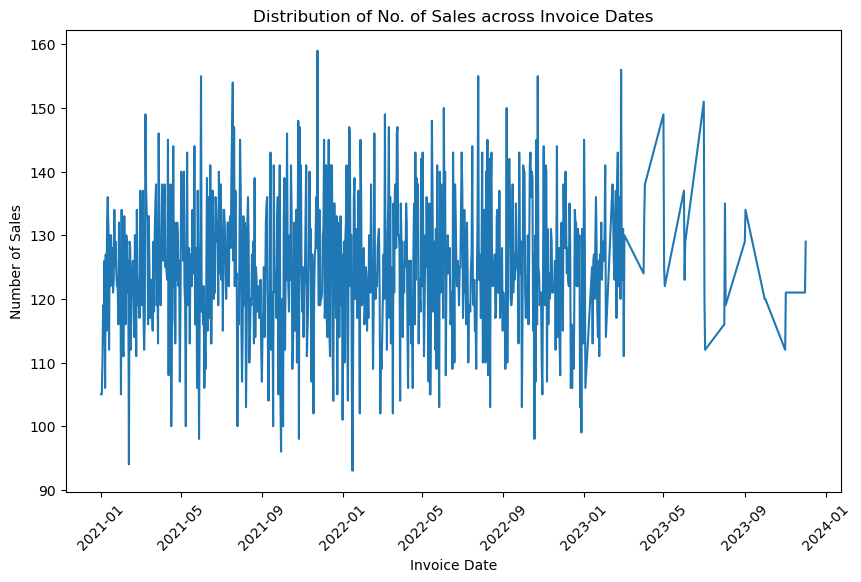

In [60]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
sales_per_date = df.groupby('invoice_date').size()
plt.figure(figsize=(10, 6))
plt.plot(sales_per_date.index, sales_per_date.values)
plt.xlabel('Invoice Date')
plt.ylabel('Number of Sales')
plt.title('Distribution of No. of Sales across Invoice Dates')
plt.xticks(rotation=45)
plt.show()

### How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Dates and Amount of Sales)

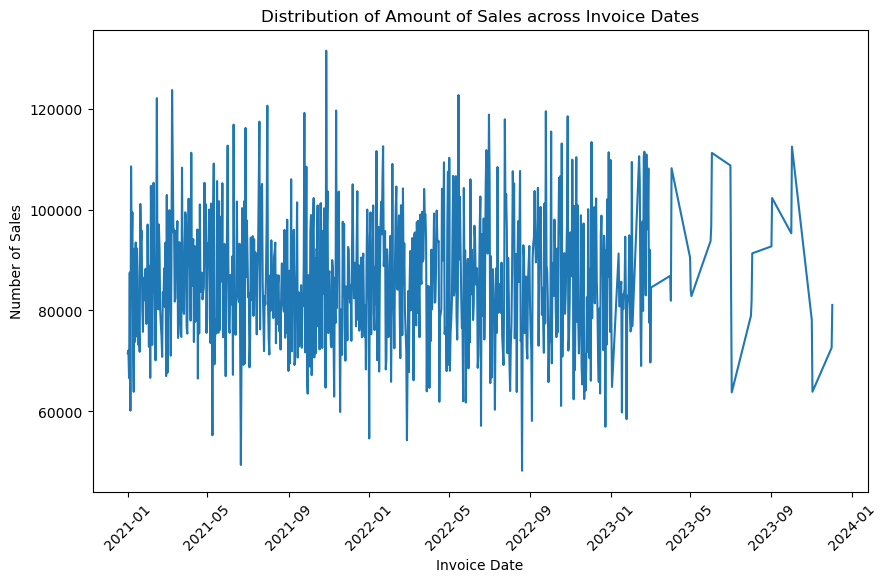

In [61]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
sales_per_date = df.groupby('invoice_date')['price'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_per_date.index, sales_per_date.values)
plt.xlabel('Invoice Date')
plt.ylabel('Number of Sales')
plt.title('Distribution of Amount of Sales across Invoice Dates')
plt.xticks(rotation=45)
plt.show()

### Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [71]:
merged_data['decade_age'] = pd.cut(merged_data['age'], bins=range(10, 100, 10), right = False)
pivot_table = pd.pivot_table(merged_data, values='price', index='category', columns='decade_age', aggfunc='sum')
pivot_table

decade_age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)"
category,,,,,,,,
Books,3454.20,21043.35,22876.50,23088.60,20634.30,21482.70,15513.60,7423.50
Clothing,510136.00,2784442.32,3041310.80,3069218.24,2831854.96,2898172.64,2092457.84,1223426.16
Cosmetics,29681.80,161989.44,197119.68,179961.16,161867.46,175488.56,113400.74,69447.28
Food & Beverage,3603.47,20334.24,23555.92,24162.60,19884.46,22211.81,14931.65,8545.82
Shoes,283880.41,1632462.40,1885734.14,1885133.97,1582648.29,1614457.30,1205741.53,719603.83
Souvenir,3214.02,15225.54,17336.94,17501.16,15272.46,15565.71,10627.38,6310.74
Technology,287700.00,1440600.00,1630650.00,1619100.00,1215900.00,1519350.00,983850.00,564900.00
Toys,16773.12,100925.44,115834.88,106552.32,93757.44,100280.32,73687.04,42577.92
